In [74]:
from astropy.table import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from astropy.table import hstack
import os

import matplotlib
import matplotlib.backends.backend_pdf

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [5]:
dev_path = '/Users/lejay/research/lephare_dev/my_code/'
output_dir = dev_path+'output_cats/'

#### with/without N(z) prior

In [38]:
# with nzprior
cat_output_13_withprior = Table.read(output_dir+'cat_out_il_nzprior_13bands.fits')
cat_output_15_withprior = Table.read(output_dir+'cat_out_il_nzprior.fits')

# without nzprior
cat_output_13 = Table.read(output_dir+'cat_out_il_13bands.fits')
cat_output_15 = Table.read(output_dir+'cat_out_il.fits')

cat_output_15 = cat_output_15['Z_BEST']
cat_output_13 = cat_output_13 ['Z_BEST']
cat_output_15_withprior = cat_output_15_withprior['Z_BEST']

cat_output = hstack([cat_output_15, cat_output_13],table_names=['15','13'])
cat_output_withprior = hstack([cat_output_15_withprior, cat_output_13_withprior],table_names=['prior_15','prior_13'])
cat_output = hstack([cat_output,cat_output_withprior])

In [39]:
# match the output catalog with COSMOS2020 and save to disk
cat_output_name = output_dir+'cat_out_13and15_prior_check.fits'
cat_c20_name = '/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits'
combined_cat_name = output_dir+'cat_out_13and15il_cosmosadded.fits'
join = '1and2'

# matching cat_output and cat_c20
cmd = 'java -jar stilts.jar tmatch2 in1='+cat_output_name + \
                ' in2='+cat_c20_name+' find=best join='+join+' matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000 DELTA_J2000" out='+combined_cat_name
print(cmd)
os.system(cmd)

java -jar stilts.jar tmatch2 in1=/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_13and15_prior_check.fits in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC" values2="ALPHA_J2000 DELTA_J2000" out=/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_13and15il_cosmosadded.fits


0

In [40]:
cat_matched = Table.read(combined_cat_name)
cond_U = ( (cat_matched['u'] > 0.) & (cat_matched['u'] < 50.) & (cat_matched['u_err'] > 0.) & (cat_matched['u_err'] < 0.3) )| \
         ( (cat_matched['uS'] > 0.) & (cat_matched['uS'] < 50.) & (cat_matched['uS_err'] > 0.) & (cat_matched['uS_err'] < 0.3) )
cond_g = ( (cat_matched['g'] > 0.) & (cat_matched['g'] < 50.) & (cat_matched['g_err'] > 0.) & (cat_matched['g_err'] < 0.3) ) 
cond_r = ( (cat_matched['r'] > 0.) & (cat_matched['r'] < 50.) & (cat_matched['r_err'] > 0.) & (cat_matched['r_err'] < 0.3) )
cond_i = ( (cat_matched['i'] > 0.) & (cat_matched['i'] < 50.) & (cat_matched['i_err'] > 0.) & (cat_matched['i_err'] < 0.3) )
cond_z = ( (cat_matched['z'] > 0.) & (cat_matched['z'] < 50.) & (cat_matched['z_err'] > 0.) & (cat_matched['z_err'] < 0.3) )
cond_y = ( (cat_matched['y'] > 0.) & (cat_matched['y'] < 50.) & (cat_matched['y_err'] > 0.) & (cat_matched['y_err'] < 0.3) )
flag_optical = cond_U.astype(int) + cond_g.astype(int) + cond_r.astype(int) + cond_i.astype(int) + cond_z.astype(int) + cond_y.astype(int)

cond_Y = ( (cat_matched['Yv'] > 0.) & (cat_matched['Yv'] < 50.) & (cat_matched['Yv_err'] > 0.) & (cat_matched['Yv_err'] < 0.3) )
cond_J = ( (cat_matched['J'] > 0.) & (cat_matched['J'] < 50.) & (cat_matched['J_err'] > 0.) & (cat_matched['J_err'] < 0.3) )
cond_H = ( (cat_matched['H'] > 0.) & (cat_matched['H'] < 50.) & (cat_matched['H_err'] > 0.) & (cat_matched['H_err'] < 0.3) )
cond_Ks = ( (cat_matched['Ks'] > 0.) & (cat_matched['Ks'] < 50.) & (cat_matched['Ks_err'] > 0.) & (cat_matched['Ks_err'] < 0.3) )
flag_nir = cond_Y.astype(int) + cond_J.astype(int) + cond_H.astype(int) + cond_Ks.astype(int)

cond_ch1 = ( (cat_matched['MAG_AUTO_CH1'] > 0.) & (cat_matched['MAG_AUTO_CH1'] < 50.) & (cat_matched['MAGERR_AUTO_CH1'] > 0.) & (cat_matched['MAGERR_AUTO_CH1'] < 0.5) )
cond_ch2 = ( (cat_matched['MAG_AUTO_CH2'] > 0.) & (cat_matched['MAG_AUTO_CH2'] < 50.) & (cat_matched['MAGERR_AUTO_CH2'] > 0.) & (cat_matched['MAGERR_AUTO_CH2'] < 0.5) )
flag_irac = cond_ch1.astype(int) + cond_ch2.astype(int) 

cond_massive_c20 = (cat_matched['lp_mass_med']>11.3)
cond_massive_v = (cat_matched['MASS_MED']>11.3)
print(len(cat_matched))

2484


/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


13
0.15384615384615385
0.15384615384615385


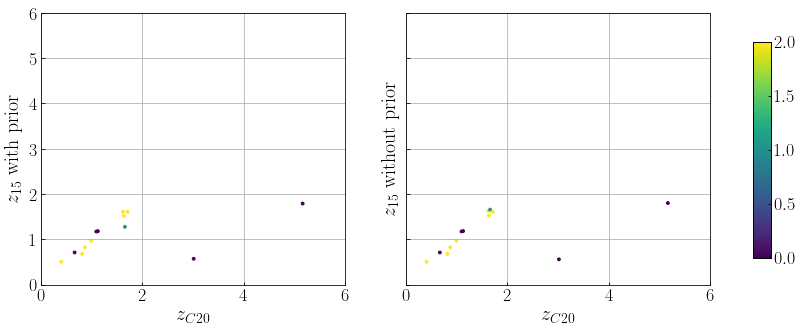

In [41]:
cat_select = cat_matched[cond_massive_c20]
print(len(cat_select))

fig, axs = plt.subplots(1, 2, figsize = (12, 5),sharex=True, sharey=True)
im = axs[0].scatter(cat_select['lp_zPDF'],cat_select['Z_BEST_prior_15'],s=8,c=flag_irac[cond_massive_c20],marker='o')
axs[1].scatter(cat_select['lp_zPDF'],cat_select['Z_BEST_15'],s=8,c=flag_irac[cond_massive_c20],marker='o')

outlier_factor = 0.15
print(len(cat_select[abs(cat_select['lp_zPDF']-cat_select['Z_BEST_prior_15'])>outlier_factor*(1+cat_select['lp_zPDF'])])/len(cat_select))
print(len(cat_select[abs(cat_select['lp_zPDF']-cat_select['Z_BEST_15'])>outlier_factor*(1+cat_select['lp_zPDF'])])/len(cat_select))

axs[0].set_xlim([0,6])
axs[0].set_ylim([0,6])
axs[0].set_xlabel('$z_{C20}$ ',fontsize=20)
axs[0].set_ylabel('$z_{15}$ with prior',fontsize=20)
axs[1].set_xlabel('$z_{C20}$ ',fontsize=20)
axs[1].set_ylabel('$z_{15}$ without prior',fontsize=20)

axs[0].grid()
axs[1].grid()
cb_ax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cbar = fig.colorbar(im, cax=cb_ax)
cbar = fig.colorbar(im, cax=cb_ax)

1192
0.2625838926174497
0.2634228187919463


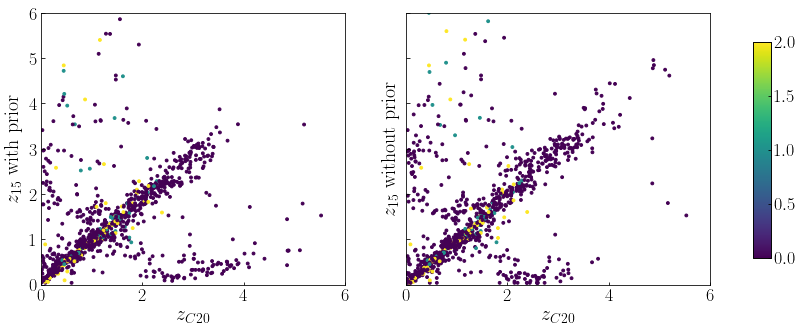

In [42]:
cat_select = cat_matched[(flag_nir==0)]
print(len(cat_select))

fig, axs = plt.subplots(1, 2, figsize = (12, 5),sharex=True, sharey=True)
im = axs[0].scatter(cat_select['lp_zPDF'],cat_select['Z_BEST_prior_15'],s=8,c=flag_irac[(flag_nir==0)],marker='o')
axs[1].scatter(cat_select['lp_zPDF'],cat_select['Z_BEST_15'],s=8,c=flag_irac[(flag_nir==0)],marker='o')

outlier_factor = 0.15
print(len(cat_select[abs(cat_select['lp_zPDF']-cat_select['Z_BEST_prior_15'])>outlier_factor*(1+cat_select['lp_zPDF'])])/len(cat_select))
print(len(cat_select[abs(cat_select['lp_zPDF']-cat_select['Z_BEST_15'])>outlier_factor*(1+cat_select['lp_zPDF'])])/len(cat_select))

axs[0].set_xlim([0,6])
axs[0].set_ylim([0,6])
axs[0].set_xlabel('$z_{C20}$ ',fontsize=20)
axs[0].set_ylabel('$z_{15}$ with prior',fontsize=20)
axs[1].set_xlabel('$z_{C20}$ ',fontsize=20)
axs[1].set_ylabel('$z_{15}$ without prior',fontsize=20)

cb_ax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cbar = fig.colorbar(im, cax=cb_ax)
cbar = fig.colorbar(im, cax=cb_ax)

#### check coverage of the sample

In [89]:
cosmos_v9 = Table.read('clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v9_gal_cut_params_sfq_added.fits')
inside_j=cosmos_v9['inside_j']

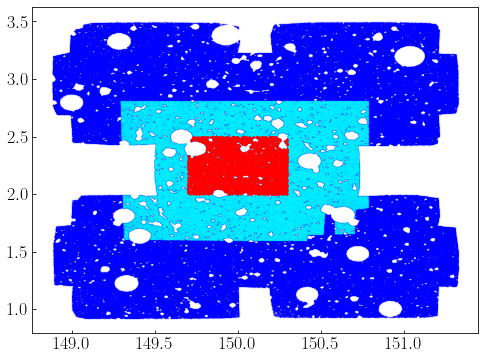

In [128]:
fig, axs = plt.subplots(1, 1, figsize = (8, 6),sharex=True, sharey=True)
cat_output_full_name = output_dir+'cat_out_15band_il.fits'
cat_output = Table.read(cat_output_full_name)

plt.scatter(cosmos_v9['RA'],cosmos_v9 ['DEC'],s=0.1,alpha=0.1,c='b')
plt.scatter(cosmos_v9[inside_j]['RA'],cosmos_v9[inside_j]['DEC'],s=0.1,alpha=0.1,c='cyan')
plt.scatter(cat_output['RA'],cat_output['DEC'],s=1,color='r')

### Comparisons to C20 with 4 photometry configs
1. UV - y
2. UV -y and IRAC
3. UV- Ks
4. UV - IRAC

In [138]:
# the output catalogs (after photoz and mass runs)
cat_output_no_irac_nir_mass_name = output_dir+'cat_out_noniriracil_formass.fits'
cat_output_no_irac_mass_name = output_dir+'cat_out_noirac_il_formass.fits'
cat_output_no_nir_mass_name = output_dir+'cat_out_nonir_il_formass.fits'
cat_output_full_mass_name = output_dir+'cat_out_15band_il_formass.fits'
cat_names = [cat_output_no_irac_nir_mass_name, cat_output_no_irac_mass_name, cat_output_no_nir_mass_name, cat_output_full_mass_name]
filter_selections = ['no nir\&irac','no irac / with nir','no nir / with irac','full']

In [139]:
for i,cat_name in enumerate(cat_names):    
    cat_output_name = cat_name; print(cat_name)
    cat_c20_name = '/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits'
    combined_cat_name = cat_output_name.replace('.fits','c20added.fits')
    
    col_list = "'RA DEC MASS_MED'"
    cmd = 'java -jar stilts.jar tmatchn multimode=pairs nin=3 matcher=sky params=1.0\
       in1='+cat_output_name+' values1="RA DEC" \
       in2='+cat_c20_name+' values2="ALPHA_J2000 DELTA_J2000" \
       in3=/Volumes/LejaySSD/v11_cats/COSMOS6bandesv11_bc03_zphot.fits values3="RA DEC" \
       out='+ combined_cat_name+' icmd3="keepcols '+col_list+'" '
    print(cmd)
    os.system(cmd)
    
    if i==0:
        cat_matched = Table.read(combined_cat_name)
        cat_matched = cat_matched[cat_matched['lp_zPDF']>0]
        cond_U = ( (cat_matched['u'] > 0.) & (cat_matched['u'] < 50.) & (cat_matched['u_err'] > 0.) & (cat_matched['u_err'] < 0.3) )| \
                 ( (cat_matched['uS'] > 0.) & (cat_matched['uS'] < 50.) & (cat_matched['uS_err'] > 0.) & (cat_matched['uS_err'] < 0.3) )
        cond_g = ( (cat_matched['g'] > 0.) & (cat_matched['g'] < 50.) & (cat_matched['g_err'] > 0.) & (cat_matched['g_err'] < 0.3) ) 
        cond_r = ( (cat_matched['r'] > 0.) & (cat_matched['r'] < 50.) & (cat_matched['r_err'] > 0.) & (cat_matched['r_err'] < 0.3) )
        cond_i = ( (cat_matched['i'] > 0.) & (cat_matched['i'] < 50.) & (cat_matched['i_err'] > 0.) & (cat_matched['i_err'] < 0.3) )
        cond_z = ( (cat_matched['z'] > 0.) & (cat_matched['z'] < 50.) & (cat_matched['z_err'] > 0.) & (cat_matched['z_err'] < 0.3) )
        cond_y = ( (cat_matched['y'] > 0.) & (cat_matched['y'] < 50.) & (cat_matched['y_err'] > 0.) & (cat_matched['y_err'] < 0.3) )
        flag_optical = cond_U.astype(int) + cond_g.astype(int) + cond_r.astype(int) + cond_i.astype(int) + cond_z.astype(int) + cond_y.astype(int)

        cond_Y = ( (cat_matched['Yv'] > 0.) & (cat_matched['Yv'] < 50.) & (cat_matched['Yv_err'] > 0.) & (cat_matched['Yv_err'] < 0.3) )
        cond_J = ( (cat_matched['J'] > 0.) & (cat_matched['J'] < 50.) & (cat_matched['J_err'] > 0.) & (cat_matched['J_err'] < 0.3) )
        cond_H = ( (cat_matched['H'] > 0.) & (cat_matched['H'] < 50.) & (cat_matched['H_err'] > 0.) & (cat_matched['H_err'] < 0.3) )
        cond_Ks = ( (cat_matched['Ks'] > 0.) & (cat_matched['Ks'] < 50.) & (cat_matched['Ks_err'] > 0.) & (cat_matched['Ks_err'] < 0.3) )
        flag_nir = cond_Y.astype(int) + cond_J.astype(int) + cond_H.astype(int) + cond_Ks.astype(int)

        cond_ch1 = ( (cat_matched['MAG_AUTO_CH1_CORR'] > 0.) & (cat_matched['MAG_AUTO_CH1_CORR'] < 50.) & (cat_matched['MAGERR_AUTO_CH1_CORR'] > 0.) & (cat_matched['MAGERR_AUTO_CH1_CORR'] < 0.5) )
        cond_ch2 = ( (cat_matched['MAG_AUTO_CH2_CORR'] > 0.) & (cat_matched['MAG_AUTO_CH2_CORR'] < 50.) & (cat_matched['MAGERR_AUTO_CH2_CORR'] > 0.) & (cat_matched['MAGERR_AUTO_CH2_CORR'] < 0.5) )
        flag_irac = cond_ch1.astype(int) + cond_ch2.astype(int) 
        
        flag_list = [flag_optical,flag_nir,flag_irac,flag_nir]
        flag_name_list = ['flag optical','flag nir','flag irac',' flag nir']
        
        if len(cat_matched) != len(flag_optical) or len(cat_matched) != len(flag_nir) or len(cat_matched) != len(flag_irac):
            print('lengths do not match')
        else:
            print(len(cat_matched))
    

/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noniriracil_formass.fits
java -jar stilts.jar tmatchn multimode=pairs nin=3 matcher=sky params=1.0       in1=/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noniriracil_formass.fits values1="RA DEC"        in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits values2="ALPHA_J2000 DELTA_J2000"        in3=/Volumes/LejaySSD/v11_cats/COSMOS6bandesv11_bc03_zphot.fits values3="RA DEC"        out=/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noniriracil_formassc20added.fits icmd3="keepcols 'RA DEC MASS_MED'" 
29285
/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noirac_il_formass.fits
java -jar stilts.jar tmatchn multimode=pairs nin=3 matcher=sky params=1.0       in1=/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noirac_il_formass.fits values1="RA DEC"        in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fit

#### redshift comparison plots

In [140]:
massive_cut = 11.2

Number of objects: 29285


/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


Number of objects: 150


/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


Number of objects: 460


/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


Number of objects: 227


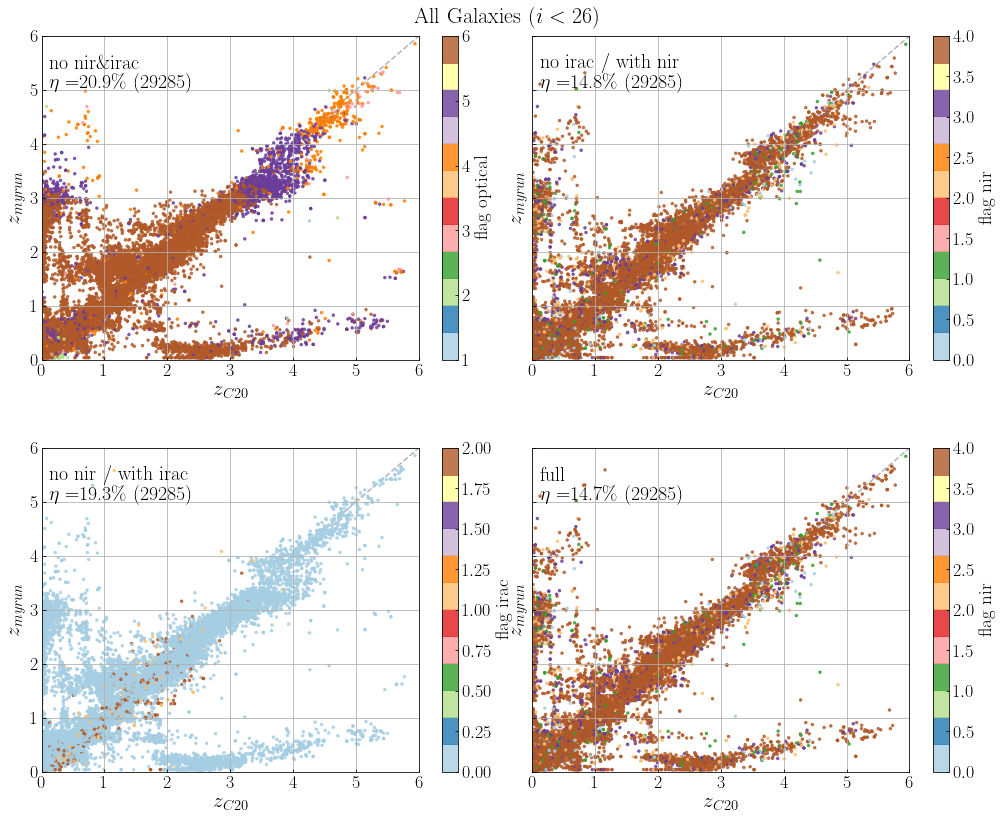

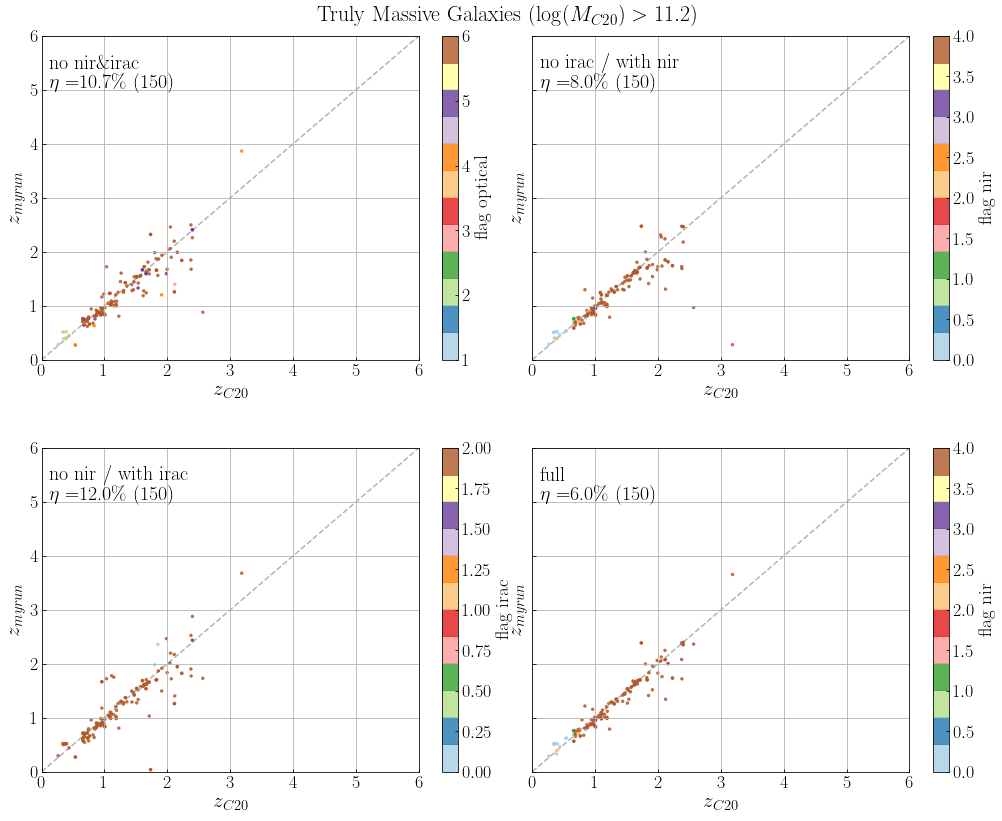

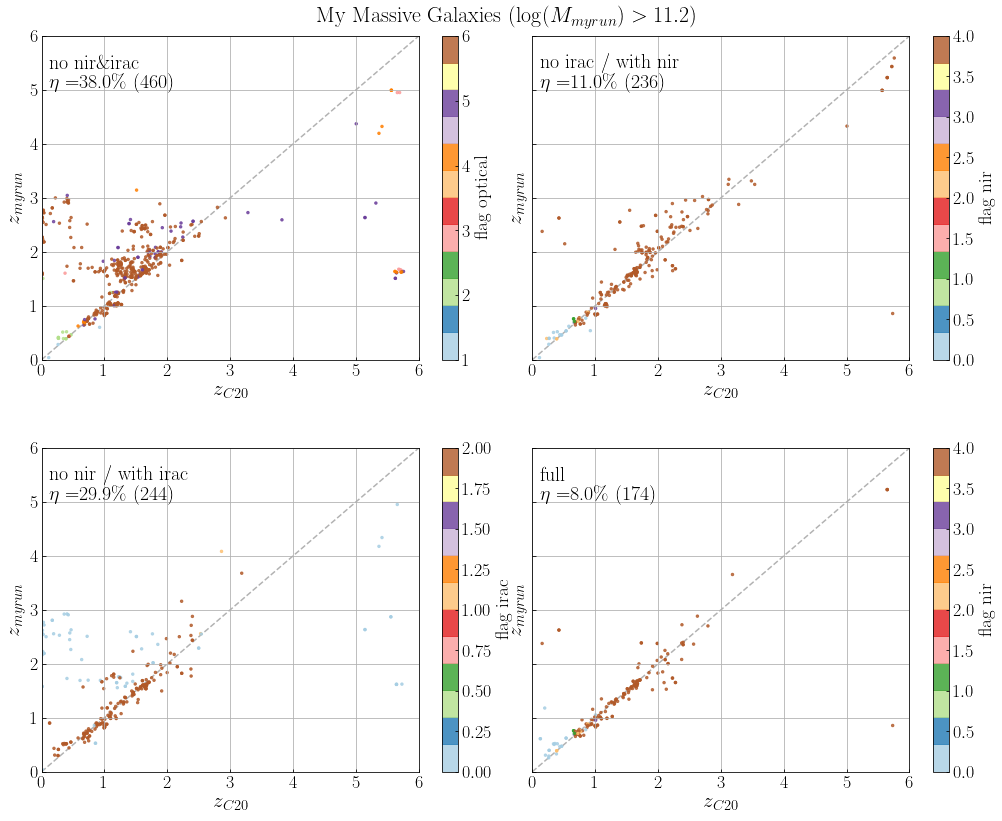

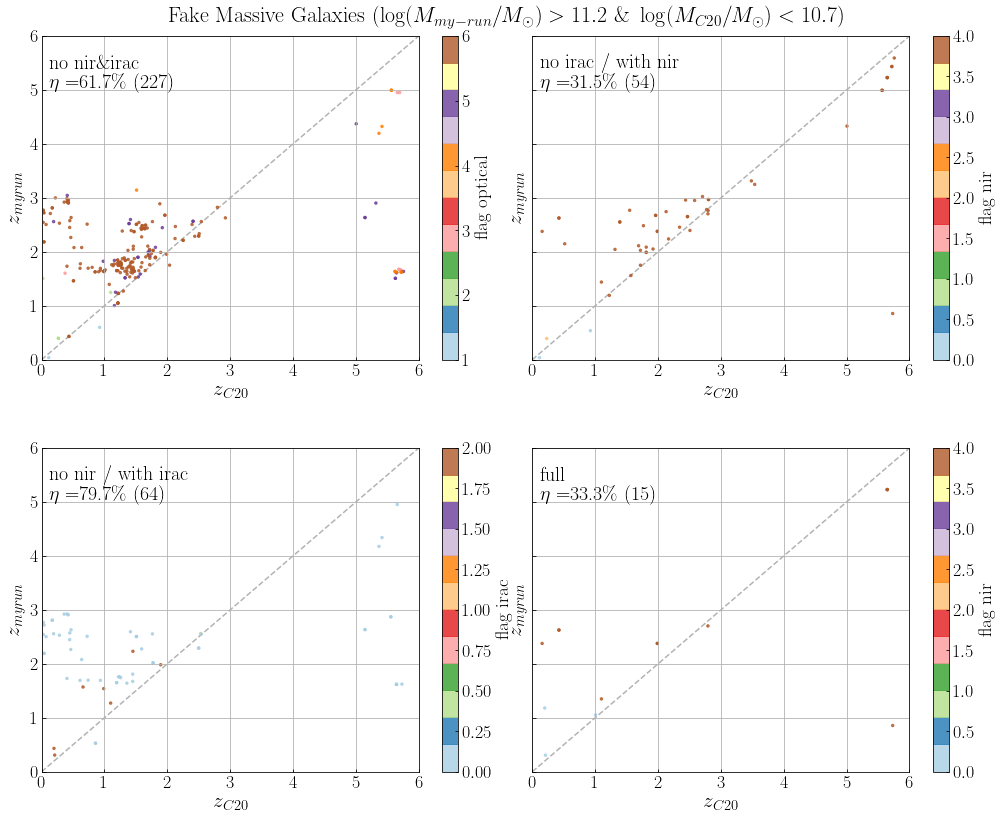

In [141]:
pdf = matplotlib.backends.backend_pdf.PdfPages("/Users/lejay/Desktop/lephare_photoz_comparison.pdf")
for selection in ['all','massive','massive_c20','fake_massive']:
    fig, axs = plt.subplots(2, 2, figsize = (15, 12), sharey=True)
    for i,cat_name in enumerate(cat_names):
        row = i // 2
        col = i % 2
        cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
        cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]
        # select subsample
        if selection == 'all':
            cond = np.ones(len(cat_output_c20added)).astype(bool)
            fig_title = 'All Galaxies ($i<26$)'
        elif selection == 'massive':
            cond = (cat_output_c20added['lp_mass_med']>massive_cut)
            fig_title = 'Truly Massive Galaxies ($\log(M_{C20})>'+str(massive_cut)+'$)'
        elif selection == 'massive_c20':
            cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut)
            fig_title = 'My Massive Galaxies ($\log(M_{myrun})>'+str(massive_cut)+'$)'
        elif selection == 'fake_massive':
            cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut) & (cat_matched['lp_mass_med']<massive_cut-0.5)
            fig_title = 'Fake Massive Galaxies ($\log(M_{my-run}/M_\odot)>'+str(massive_cut)+' ~ \& ~ \log(M_{C20}/M_\odot)<'+str(massive_cut-0.5)+'$)'
        else:
            raise NameError('wrong name')
    
        # plot
        if i==0: print('Number of objects:',len(cond[cond]))
        im = axs[row][col].scatter(cat_output_c20added[cond]['lp_zPDF'], cat_output_c20added[cond]['Z_BEST'],s=6,c=flag_list[i][cond],alpha=0.8,cmap='Paired')
        axs[row][col].plot([0,6],[0,6],'--k',alpha=0.3,zorder=0)
        axs[row][col].set_xlim([0,6])
        axs[row][col].set_ylim([0,6])
        axs[row][col].set_xlabel(r'$z_{C20}$',fontsize=21)
        axs[row][col].set_ylabel(r'$z_{myrun}$',fontsize=21)
        axs[row][col].grid()
        cbar = fig.colorbar(im, ax=axs[row][col])
        cbar.ax.set_ylabel(flag_name_list[i],fontsize=19)
    
        # print out outlier fraction
        outlier_factor = 0.15
        num_outliers_15 = len(cat_output_c20added[cond][abs(cat_output_c20added[cond]['lp_zPDF']-cat_output_c20added[cond]['Z_BEST'])>outlier_factor*(1+cat_output_c20added[cond]['lp_zPDF'])])
    
        axs[row][col].annotate(filter_selections[i],xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='k')
        axs[row][col].annotate('$\eta=$'+str(round(num_outliers_15/len(cat_output_c20added[cond])*100,1))+'\% '+'('+str(len(flag_list[i][cond]))+')',xy=([0.02,0.84]),xycoords='axes fraction',fontsize=20,color='k')
    
    plt.suptitle(fig_title,fontsize=22)
    plt.tight_layout(pad=4,w_pad=-1.5)
    pdf.savefig( fig )
pdf.close()

#### mass vs redshift comparison plots

In [199]:
massive_cut = 11.2

In [200]:
# check fake massives
cat_output_c20added = Table.read(cat_output_no_nir_mass_name.replace('.fits','c20added.fits'))
cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]
cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut) & (cat_matched['lp_mass_med']<(massive_cut-0.5))  # fake massive

cond_ch1 = ( (cat_output_c20added['MAG_AUTO_CH1_CORR'] > 0.) & (cat_output_c20added['MAG_AUTO_CH1_CORR'] < 50.) & (cat_output_c20added['MAGERR_AUTO_CH1_CORR'] > 0.) & (cat_output_c20added['MAGERR_AUTO_CH1_CORR'] < 0.5) )
cond_ch2 = ( (cat_output_c20added['MAG_AUTO_CH2_CORR'] > 0.) & (cat_output_c20added['MAG_AUTO_CH2_CORR'] < 50.) & (cat_output_c20added['MAGERR_AUTO_CH2_CORR'] > 0.) & (cat_output_c20added['MAGERR_AUTO_CH2_CORR'] < 0.5) )
flag_irac = cond_ch1.astype(int) + cond_ch2.astype(int)
flag_irac_col = Column(name='flag_irac',data=flag_irac)
cat_output_c20added.add_column(flag_irac_col)

# cat_output_c20added[cond]['ID_1','i','MAG_AUTO_CH1_CORR','MAGERR_AUTO_CH1_CORR','MAG_AUTO_CH2_CORR','MAGERR_AUTO_CH2_CORR','flag_irac'].show_in_notebook()

/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


In [223]:
## load shiraz catalog
cat_shiraz = Table.read('/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_CH1_newfluxes_errmod.fits')
cond_ch1_shiraz = ( (cat_shiraz['MAG_AUTO'] > 0.) & (cat_shiraz['MAG_AUTO'] < 50) & (cat_shiraz['MAGERR_AUTO'] > 0.) & (cat_shiraz['MAGERR_AUTO'] < 0.5) )

cat_shiraz_select = cat_shiraz[cond_ch1_shiraz]
cat_shiraz_select = cat_shiraz_select[cat_shiraz_select['ALPHA_J2000']>149.7]
cat_shiraz_select = cat_shiraz_select[cat_shiraz_select['ALPHA_J2000']<150.3]
cat_shiraz_select = cat_shiraz_select[cat_shiraz_select['DELTA_J2000']>2.0]
cat_shiraz_select = cat_shiraz_select[cat_shiraz_select['DELTA_J2000']<2.5]

64it [00:00, 106.32it/s]


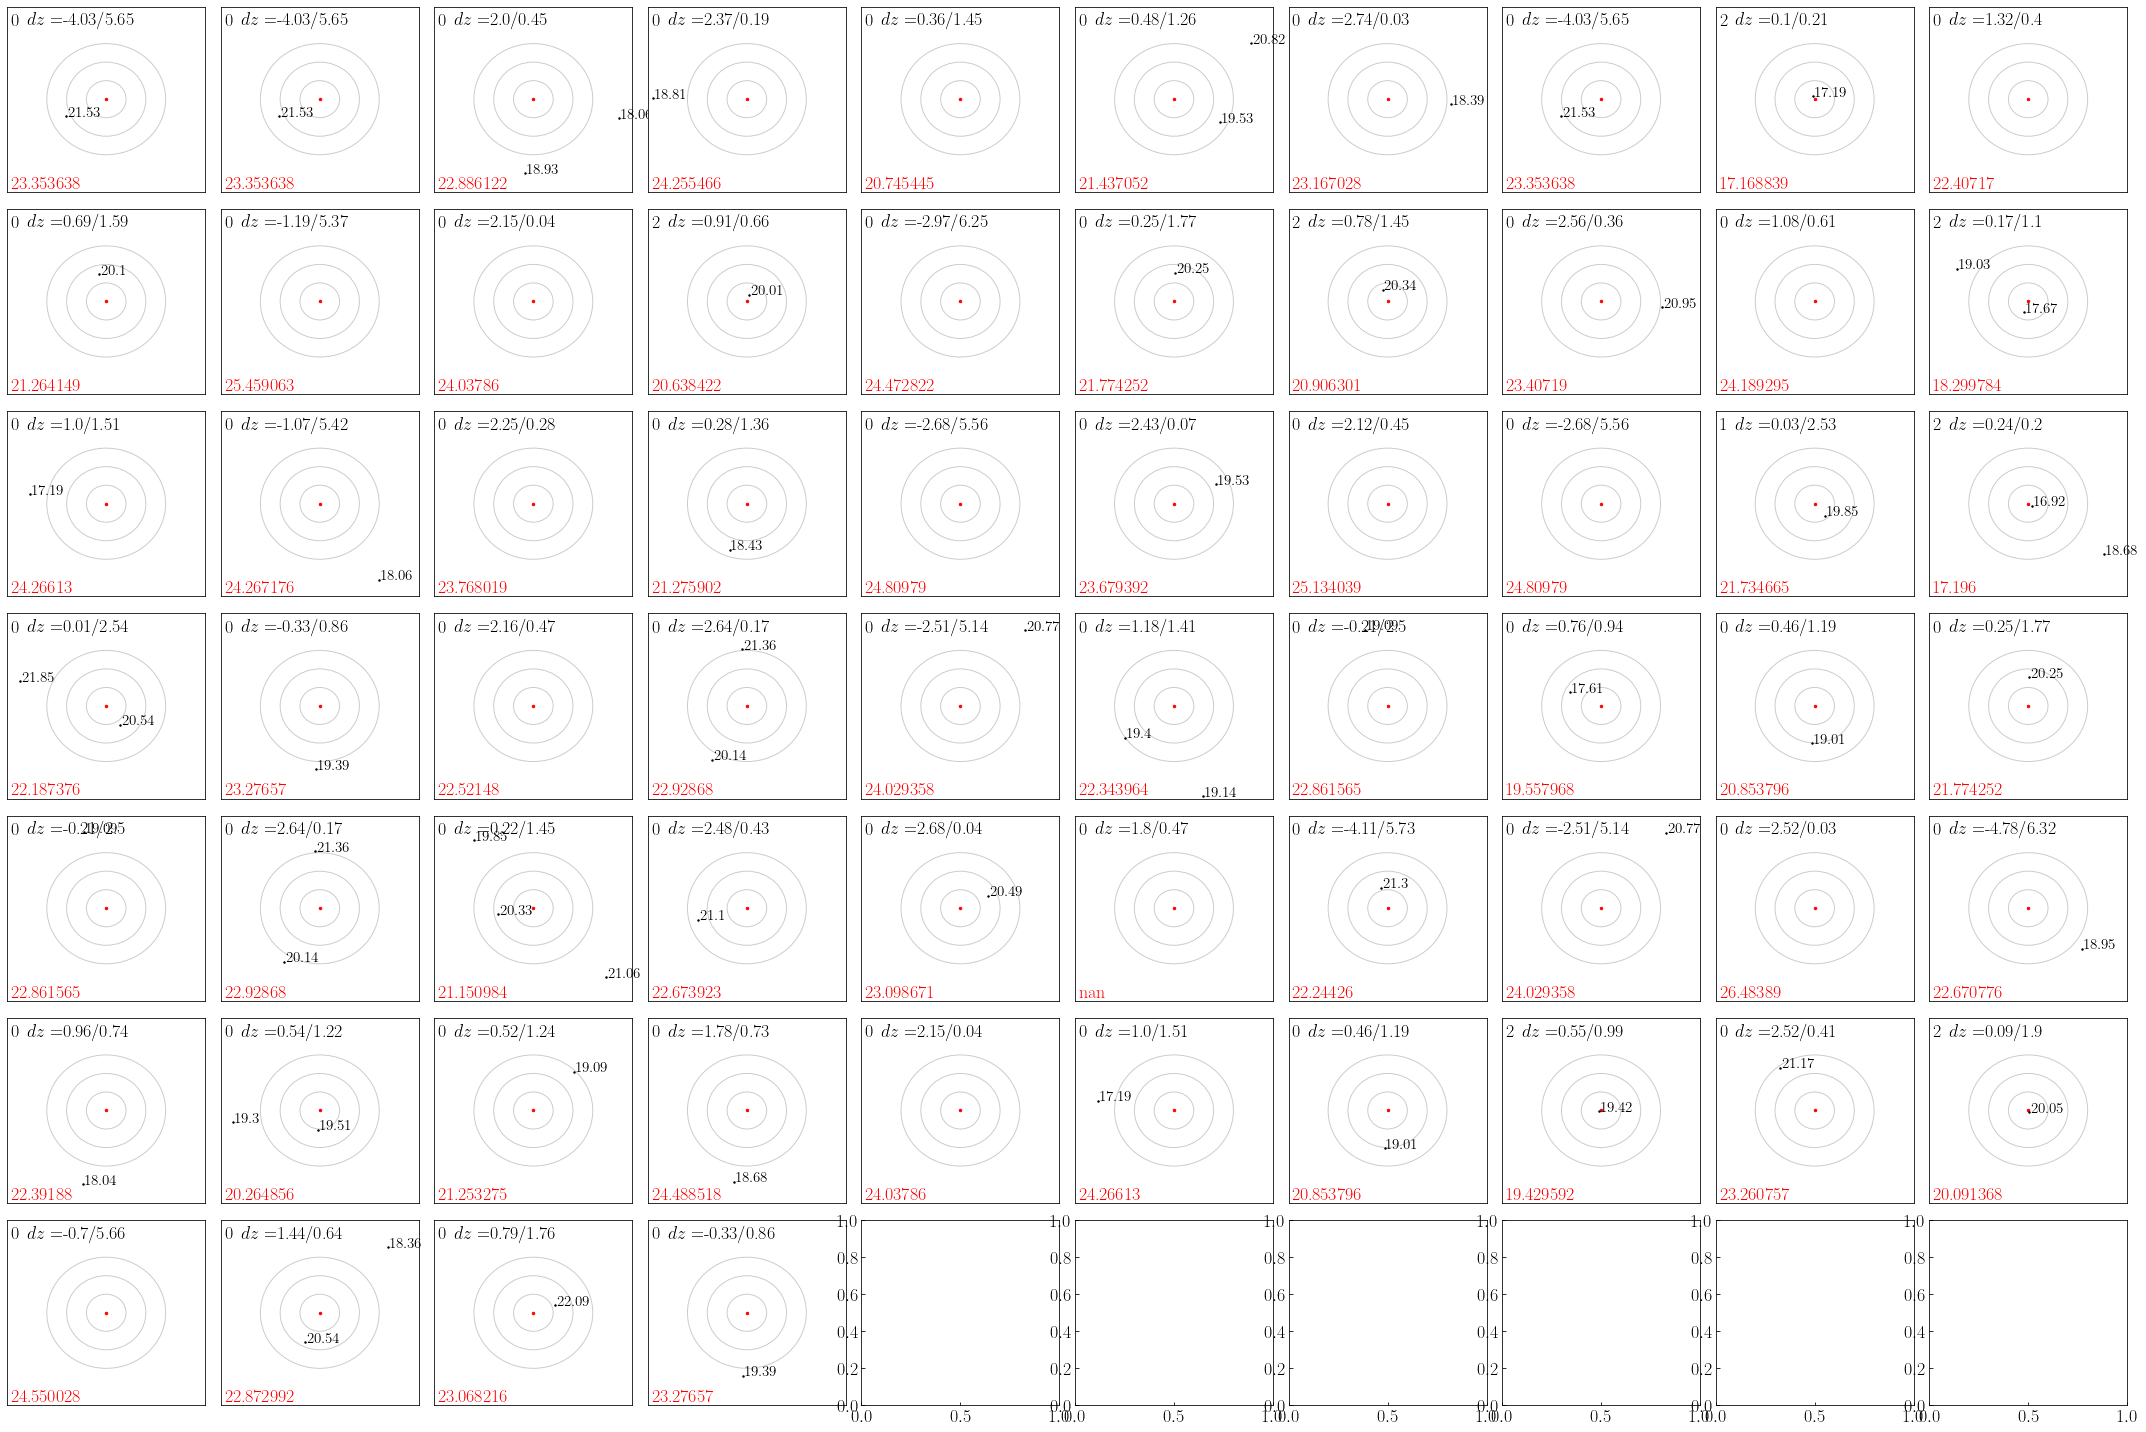

In [246]:
fake_massive_gals = cat_output_c20added[cond]

fig, axs = plt.subplots(len(fake_massive_gals)//10+1, 10, figsize = (30,20))
for i, gal in tqdm(enumerate(fake_massive_gals)):
    row = i // 10
    col = i % 10
    
    axs[row][col].scatter(gal['RA_1'],gal['DEC_1'],s=6,c='r')
    for r in [1,2,3]:
        circle = plt.Circle((gal['RA_1'],gal['DEC_1']),r/3600.,fill=False,alpha=0.2)
        axs[row][col].add_patch(circle)
    
    cat_shiraz_neighbor = cat_shiraz_select[abs(cat_shiraz_select['ALPHA_J2000']-gal['RA_1'])<5./3600]
    cat_shiraz_neighbor = cat_shiraz_neighbor[abs(cat_shiraz_neighbor['DELTA_J2000']-gal['DEC_1'])<5./3600]
    axs[row][col].scatter(cat_shiraz_neighbor['ALPHA_J2000'],cat_shiraz_neighbor['DELTA_J2000'],s=2,c='k',alpha=1)
    for gal_shiraz in cat_shiraz_neighbor:
        axs[row][col].annotate(round(gal_shiraz['MAG_AUTO'],2),xy=([gal_shiraz['ALPHA_J2000']+0.1/3600,gal_shiraz['DELTA_J2000']]),xycoords='data',fontsize=15,color='k')
        
    axs[row][col].annotate(gal['flag_irac'],xy=([0.02,0.9]),xycoords='axes fraction',fontsize=18,color='k')
    axs[row][col].annotate('$dz=$'+str(round(gal['Z_BEST'] - gal['lp_zPDF'],2))+'/'+str(round(gal['lp_zPDF'],2)),xy=([0.1,0.9]),xycoords='axes fraction',fontsize=18,color='k')
    axs[row][col].annotate(gal['IRAC_CH1_MAG_1'],xy=([0.02,0.02]),xycoords='axes fraction',fontsize=18,color='r')
    axs[row][col].set_xlim([gal['RA_1']-5/3600.,gal['RA_1']+5/3600.])
    axs[row][col].set_ylim([gal['DEC_1']-5/3600.,gal['DEC_1']+5/3600.])
    axs[row][col].get_xaxis().set_visible(False)
    axs[row][col].get_yaxis().set_visible(False)

plt.tight_layout(w_pad=-2,h_pad=1)

Number of objects: 19525
Number of objects: 94
Number of objects: 286
Number of objects: 136


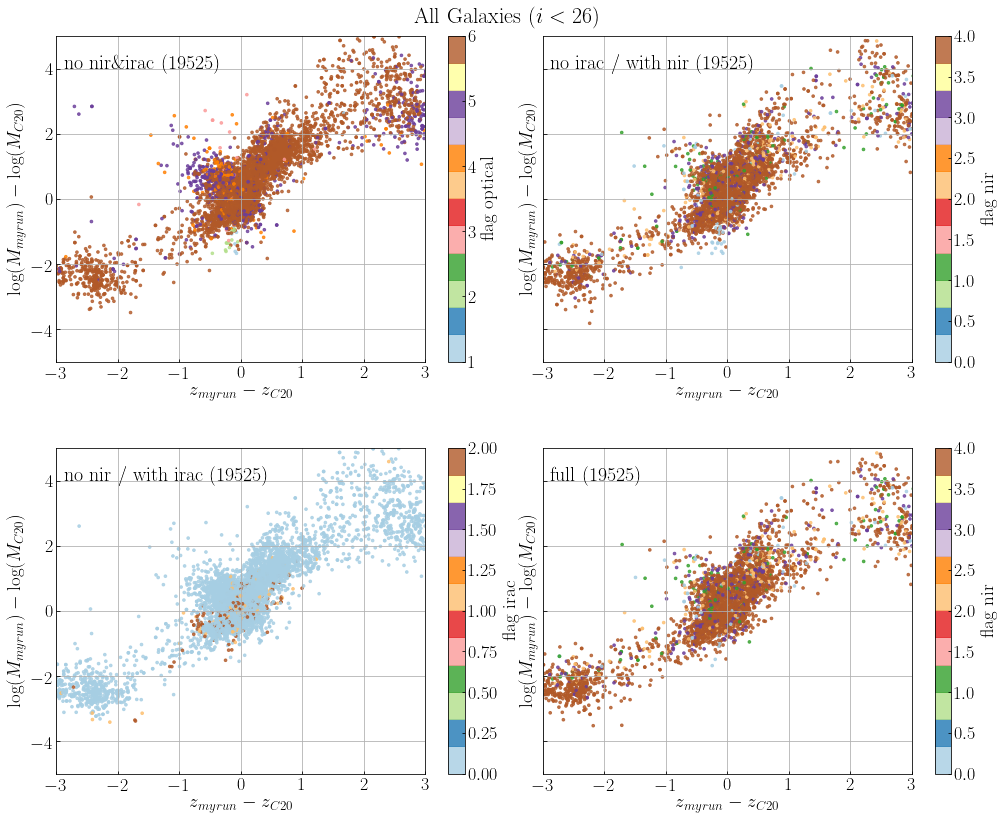

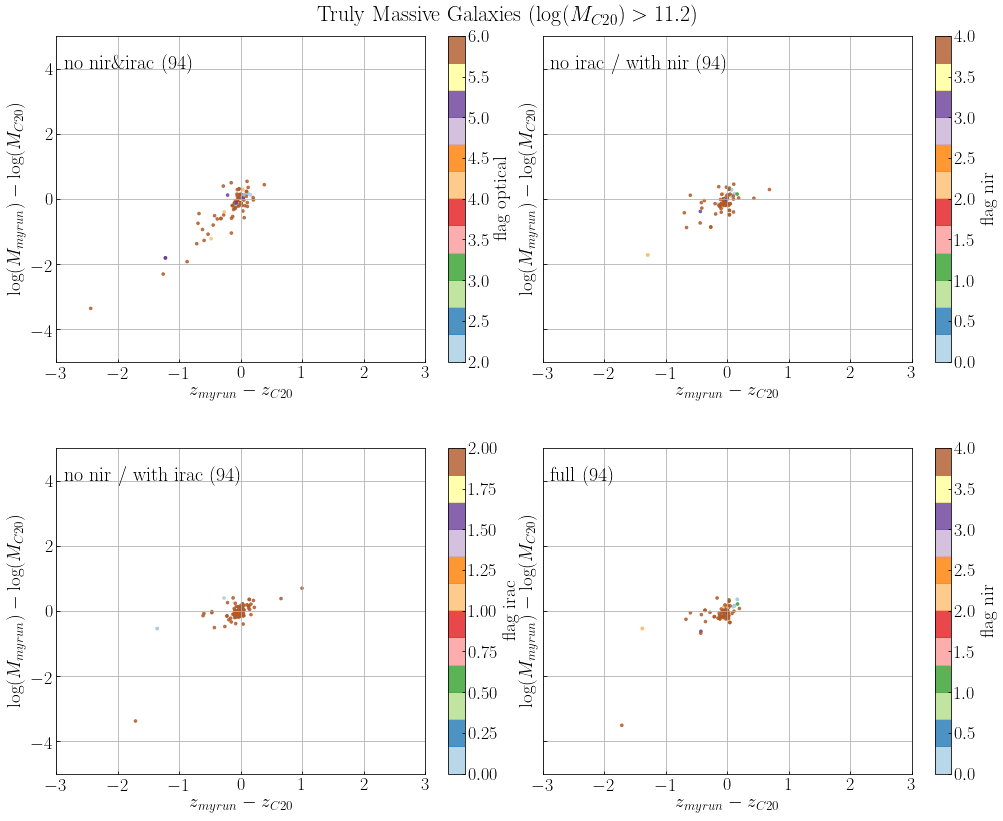

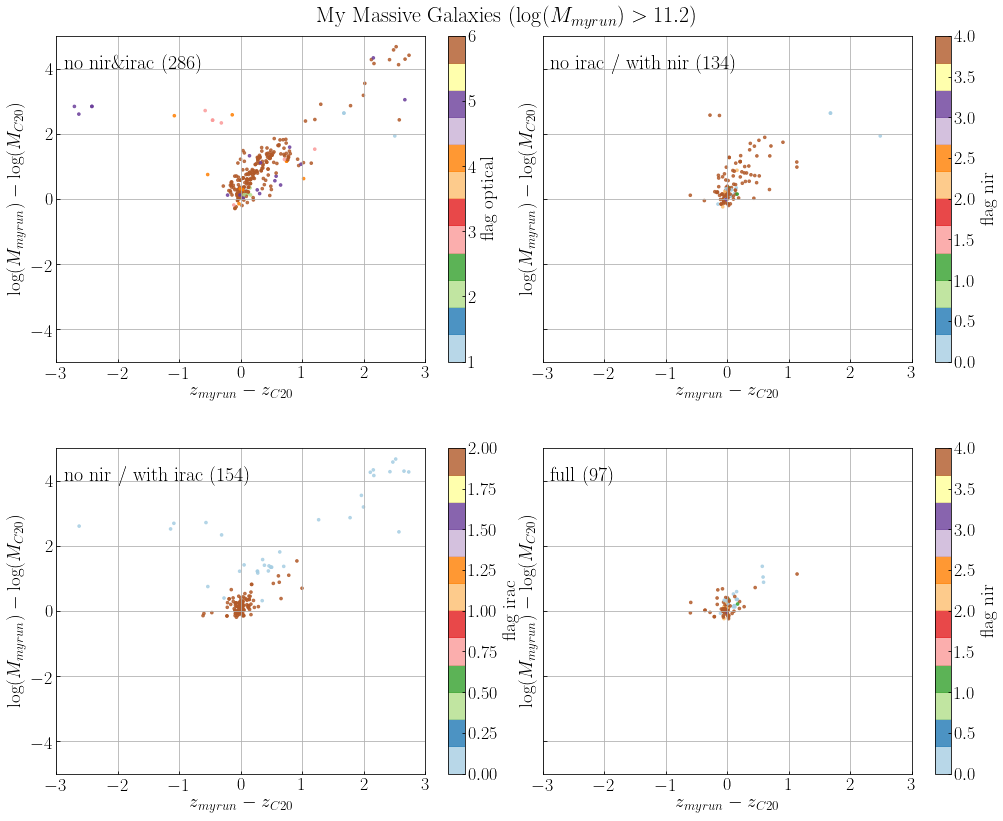

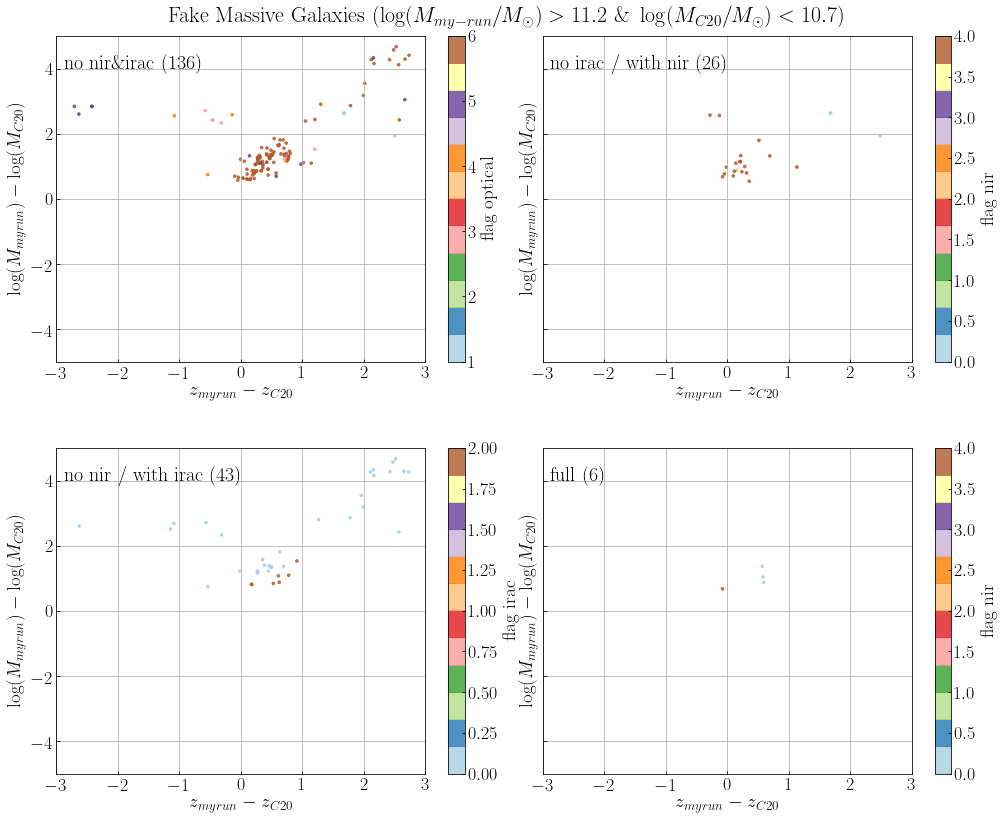

In [135]:
pdf = matplotlib.backends.backend_pdf.PdfPages("/Users/lejay/Desktop/lephare_mass_photoz_diff_comparison.pdf")
for selection in ['all','massive','massive_c20','fake_massive']:
    fig, axs = plt.subplots(2, 2, figsize = (15, 12),sharey=True)
    for i,cat_name in enumerate(cat_names):
        row = i // 2; col = i % 2
        cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
        cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]
    
        # select subsample
        if selection == 'all':
            cond = np.ones(len(cat_output_c20added)).astype(bool)
            fig_title = 'All Galaxies ($i<26$)'
        elif selection == 'massive':
            cond = (cat_output_c20added['lp_mass_med']>massive_cut)
            fig_title = 'Truly Massive Galaxies ($\log(M_{C20})>'+str(massive_cut)+'$)'
        elif selection == 'massive_c20':
            cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut)
            fig_title = 'My Massive Galaxies ($\log(M_{myrun})>'+str(massive_cut)+'$)'
        elif selection == 'fake_massive':
            cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut) & (cat_matched['lp_mass_med']<(massive_cut-0.5))
            fig_title = 'Fake Massive Galaxies ($\log(M_{my-run}/M_\odot)>'+str(massive_cut)+' ~ \& ~ \log(M_{C20}/M_\odot)<'+str(massive_cut-0.5)+'$)'
        else:
            raise NameError('wrong name')
    
        if i==0: print('Number of objects:',len(cond[cond]))
        im = axs[row][col].scatter(cat_output_c20added[cond]['Z_ML']-cat_output_c20added[cond]['lp_zPDF'],cat_output_c20added[cond]['MASS_MED_massrun']-cat_output_c20added[cond]['lp_mass_med'],s=7,c=flag_list[i][cond],alpha=0.8,cmap='Paired')
        axs[row][col].set_xlim([-3,3])
        axs[row][col].set_ylim([-5,5])
        axs[row][col].set_xlabel(r'$z_{myrun}- z_{C20}$',fontsize=19)
        axs[row][col].set_ylabel(r'$\log(M_{myrun}) - \log(M_{C20})$',fontsize=19)
        axs[row][col].grid()
        axs[row][col].annotate(filter_selections[i]+' ('+str(len(flag_list[i][cond]))+')',xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='k')
    
        cbar = fig.colorbar(im, ax=axs[row][col])
        cbar.ax.set_ylabel(flag_name_list[i],fontsize=19)
    
    
    plt.suptitle(fig_title,fontsize=22)
    plt.tight_layout(pad=4, w_pad=-1)
    pdf.savefig( fig )
pdf.close()

Number of objects: 19525
Number of objects: 94
Number of objects: 286
Number of objects: 136


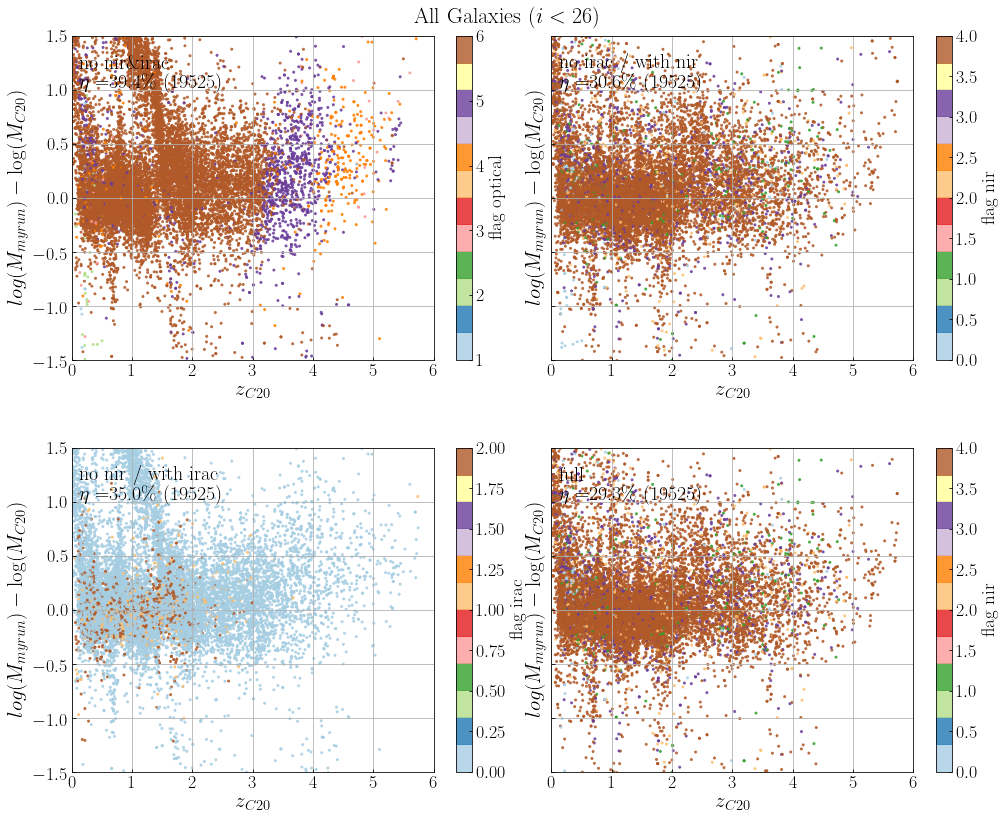

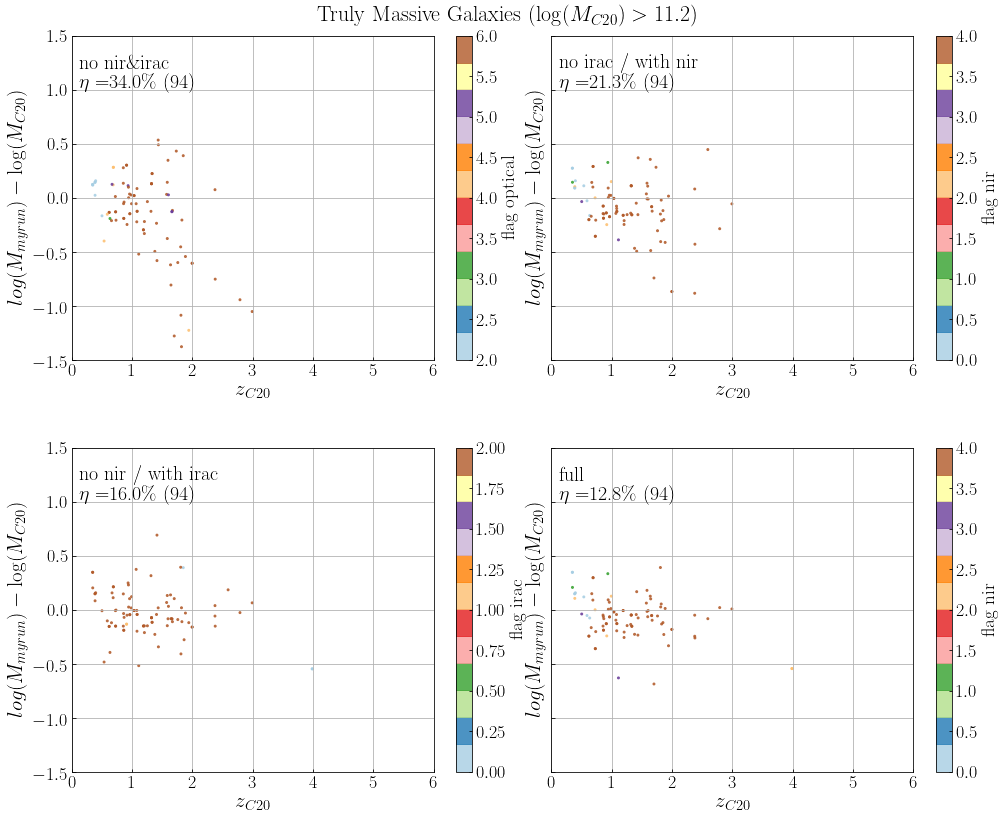

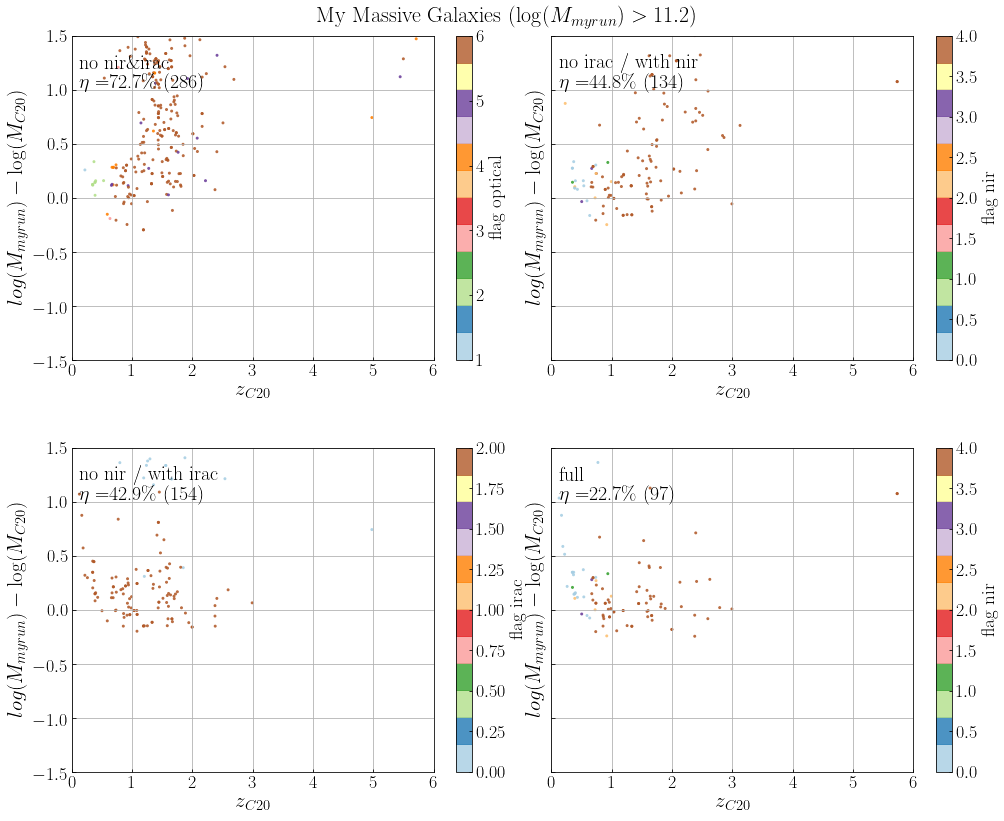

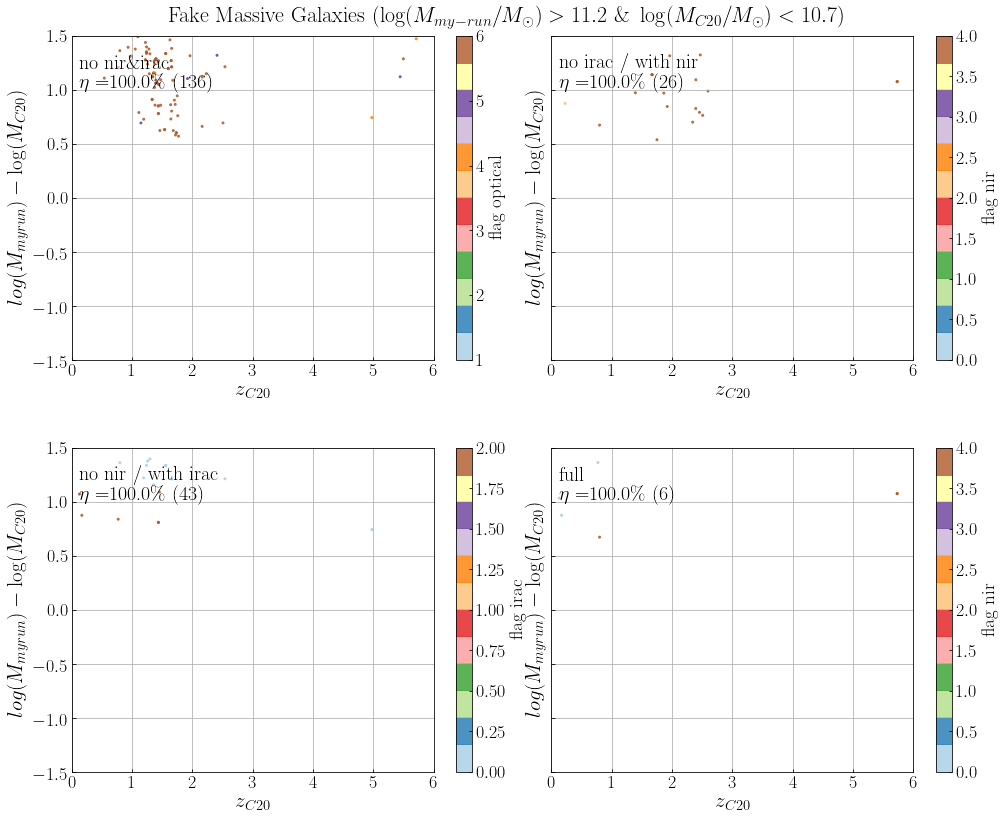

In [136]:
pdf = matplotlib.backends.backend_pdf.PdfPages("/Users/lejay/Desktop/lephare_mass_photoz_comparison.pdf")
for selection in ['all','massive','massive_c20','fake_massive']:
    fig, axs = plt.subplots(2, 2, figsize = (15, 12), sharey=True)
    for i,cat_name in enumerate(cat_names):
        row = i // 2; col = i % 2
        cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
        cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]

        # select subsample
        if selection == 'all':
            cond = np.ones(len(cat_output_c20added)).astype(bool)
            fig_title = 'All Galaxies ($i<26$)'
        elif selection == 'massive':
            cond = (cat_output_c20added['lp_mass_med']>massive_cut)
            fig_title = 'Truly Massive Galaxies ($\log(M_{C20})>'+str(massive_cut)+'$)'
        elif selection == 'massive_c20':
            cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut)
            fig_title = 'My Massive Galaxies ($\log(M_{myrun})>'+str(massive_cut)+'$)'
        elif selection == 'fake_massive':
            cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut) & (cat_matched['lp_mass_med']<massive_cut-0.5)
            fig_title = 'Fake Massive Galaxies ($\log(M_{my-run}/M_\odot)>'+str(massive_cut)+' ~ \& ~ \log(M_{C20}/M_\odot)<'+str(massive_cut-0.5)+'$)'
        else:
            raise NameError('wrong name')

        # plot
        if i==0: print('Number of objects:',len(cond[cond]))
        im = axs[row][col].scatter(cat_output_c20added[cond]['lp_zPDF'],cat_output_c20added[cond]['MASS_MED_massrun'] - cat_output_c20added[cond]['lp_mass_med'],s=4,c=flag_list[i][cond],alpha=0.8,cmap='Paired')
        axs[row][col].set_xlabel(r'$z_{C20}$',fontsize=21)
        axs[row][col].set_ylabel(r'$log(M_{myrun}) - \log(M_{C20})$',fontsize=21)
        axs[row][col].set_xlim([0,6])
        axs[row][col].set_ylim([-1.5,1.5])
        axs[row][col].grid()
        axs[row][col].annotate(filter_selections[i],xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='k')
        
         # print out outlier fraction
        outlier_factor = 0.3
        num_outliers = len(cat_output_c20added[cond][abs(cat_output_c20added[cond]['MASS_MED_massrun'] - cat_output_c20added[cond]['lp_mass_med'])>outlier_factor])
        axs[row][col].annotate('$\eta=$'+str(round(num_outliers/len(cat_output_c20added[cond])*100,1))+'\% '+'('+str(len(flag_list[i][cond]))+')',xy=([0.02,0.84]),xycoords='axes fraction',fontsize=20,color='k')
    
        cbar = fig.colorbar(im, ax=axs[row][col])
        cbar.ax.set_ylabel(flag_name_list[i],fontsize=19)
    
    plt.suptitle(fig_title,fontsize=22)
    plt.tight_layout(pad=4, w_pad=-1)
    pdf.savefig( fig )
pdf.close()

19525


/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


19525
19525
19525


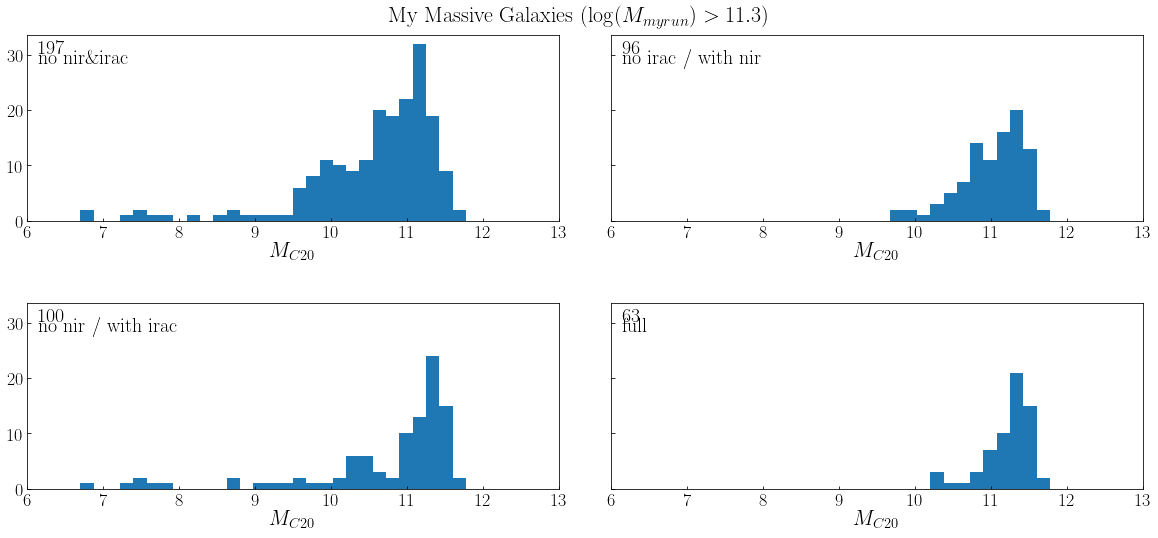

In [93]:
fig, axs = plt.subplots(2, 2, figsize = (17, 8), sharey=True)
for i,cat_name in enumerate(cat_names):
    row = i // 2
    col = i % 2
    cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
    cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]
    print(len(cat_output_c20added))
    
    # select subsample
#     cond = np.ones(len(cat_output_c20added)).astype(bool)
#     fig_title = 'All Galaxies ($i<26$)'

#     cond = (cat_output_c20added['lp_mass_med']>11.3)
#     fig_title = 'Truly Massive Galaxies ($\log(M_{C20})>11.3$)'
    
    cond = (cat_output_c20added['MASS_MED_massrun']>11.3)
    fig_title = 'My Massive Galaxies ($\log(M_{myrun})>11.3$)'
    
#     cond = (cat_output_c20added['MASS_MED_massrun']>11.3) & (cat_matched['lp_mass_med']<10.8)
#     fig_title = 'Fake Massive Galaxies ($\log(M_{my-run}/M_\odot)>11.3 ~ \& ~ \log(M_{C20}/M_\odot)<10.8$)'
    
    axs[row][col].hist(cat_output_c20added[cond]['lp_mass_med'],range=(6,13),bins=40)
    axs[row][col].annotate(filter_selections[i],xy=([0.02,0.85]),xycoords='axes fraction',fontsize=20,color='k')
    axs[row][col].annotate(len(cat_output_c20added[cond]),xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='k')
    axs[row][col].set_xlim([6,13])
    axs[row][col].set_xlabel(r'$M_{C20}$',fontsize=21)

plt.suptitle(fig_title, fontsize=22)
plt.tight_layout(pad=4)